In [1]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

In [2]:
!kaggle datasets download -d salader/dogs-vs-cats

Dataset URL: https://www.kaggle.com/datasets/salader/dogs-vs-cats
License(s): unknown
 99% 1.05G/1.06G [00:06<00:00, 227MB/s]
100% 1.06G/1.06G [00:06<00:00, 166MB/s]


In [3]:
import zipfile
zip_ref = zipfile.ZipFile('/content/dogs-vs-cats.zip','r')
zip_ref.extractall('/content')
zip_ref.close()

In [4]:
import tensorflow as tf
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense, Conv2D,MaxPooling2D, Flatten, BatchNormalization, Dropout
import matplotlib.pyplot as plt
from tensorflow.keras.callbacks import EarlyStopping

In [5]:
# Generator
train_ds = keras.utils.image_dataset_from_directory(
    directory = '/content/train',
    labels = 'inferred',
    label_mode = 'int',
    batch_size = 32,
    image_size = (256,256)
)

validation_ds = keras.utils.image_dataset_from_directory(
    directory = '/content/test',
    labels = 'inferred',
    label_mode = 'int',
    batch_size = 32,
    image_size = (256,256)
)

Found 20000 files belonging to 2 classes.
Found 5000 files belonging to 2 classes.


In [6]:
# Normalize the data
def process(image,label):
  image = tf.cast(image, tf.float32)/255.0
  return image, label

train_ds = train_ds.map(process)
validation_ds = validation_ds.map(process)

In [7]:
# Create CNN model
model = Sequential()
model.add(Conv2D(32,kernel_size = (3,3),padding = 'same', activation = 'relu', input_shape = (256,256,3)))
model.add(MaxPooling2D(pool_size = (2,2),strides = 2,padding = 'same'))

model.add(Conv2D(32,kernel_size = (3,3),padding = 'same', activation = 'relu'))
model.add(MaxPooling2D(pool_size = (2,2),strides = 2,padding = 'same'))

model.add(Conv2D(32,kernel_size = (3,3),padding = 'same', activation = 'relu'))
model.add(MaxPooling2D(pool_size = (2,2),strides = 2,padding = 'same'))

model.add(Flatten())

model.add(Dense(128,activation = 'relu'))
model.add(Dense(64,activation = 'relu'))
model.add(Dense(1,activation = 'sigmoid'))

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [8]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 256, 256, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 128, 128, 32)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 128, 128, 32)        │           9,248 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 64, 64, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 64, 64, 32)          │           9,248 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 32, 32, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 32768)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │       4,194,432 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 1)                   │              65 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 4,222,145 (16.11 MB)

 Trainable params: 4,222,145 (16.11 MB)

 Non-trainable params: 0 (0.00 B)

In [9]:
callback = EarlyStopping(monitor = 'val_loss', min_delta = 0.00001,
                         patience = 20, verbose = 1, mode = 'auto',
                         baseline = None, restore_best_weights = False)

In [10]:
model.compile(optimizer='adam',loss ='binary_crossentropy',metrics=['accuracy'])

In [11]:
history = model.fit(train_ds,epochs=25,validation_data = validation_ds, callbacks = callback)

Epoch 1/25
625/625 ━━━━━━━━━━━━━━━━━━━━ 56s 75ms/step - accuracy: 0.5760 - loss: 0.6734 - val_accuracy: 0.6690 - val_loss: 0.5986
Epoch 2/25
625/625 ━━━━━━━━━━━━━━━━━━━━ 40s 64ms/step - accuracy: 0.7290 - loss: 0.5284 - val_accuracy: 0.7652 - val_loss: 0.4991
Epoch 3/25
625/625 ━━━━━━━━━━━━━━━━━━━━ 42s 66ms/step - accuracy: 0.7963 - loss: 0.4452 - val_accuracy: 0.7878 - val_loss: 0.4711
Epoch 4/25
625/625 ━━━━━━━━━━━━━━━━━━━━ 40s 64ms/step - accuracy: 0.8409 - loss: 0.3540 - val_accuracy: 0.7686 - val_loss: 0.6455
Epoch 5/25
625/625 ━━━━━━━━━━━━━━━━━━━━ 45s 70ms/step - accuracy: 0.9044 - loss: 0.2304 - val_accuracy: 0.7722 - val_loss: 0.7668
Epoch 6/25
625/625 ━━━━━━━━━━━━━━━━━━━━ 43s 68ms/step - accuracy: 0.9525 - loss: 0.1230 - val_accuracy: 0.7590 - val_loss: 0.9543
Epoch 7/25
625/625 ━━━━━━━━━━━━━━━━━━━━ 44s 70ms/step - accuracy: 0.9733 - loss: 0.0753 - val_accuracy: 0.7666 - val_loss: 1.0246
Epoch 8/25
625/625 ━━━━━━━━━━━━━━━━━━━━ 78s 64ms/step - accuracy: 0.9786 - loss: 0.0631 - 

In [ ]:
# Above epochs we get 625 batches means (625*32 = 20000(total images in training dataset))

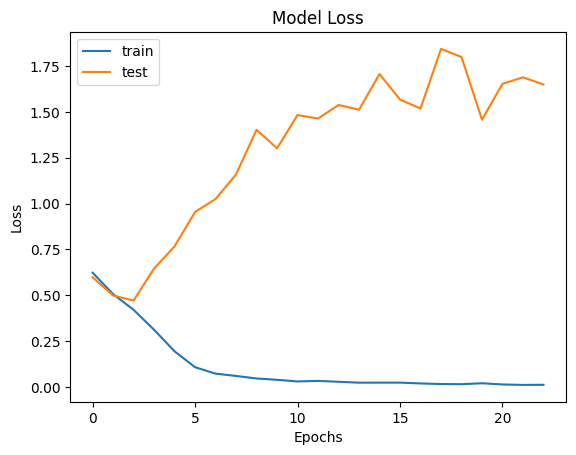

In [12]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.legend(['train', 'test'])
plt.show()

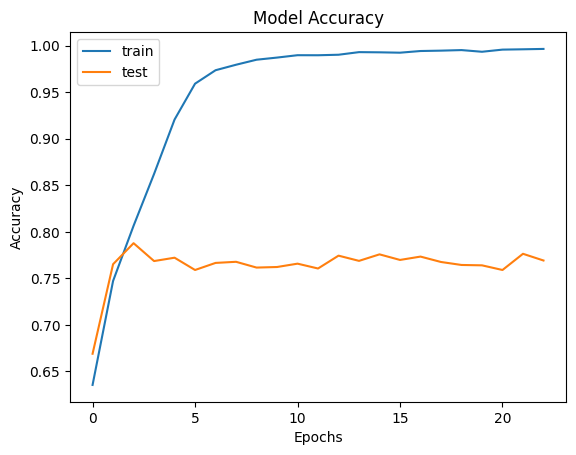

In [13]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend(['train', 'test'])
plt.show()

# To reduce the overfitting we use BatchNormalization & Dropout

In [14]:
model1 = Sequential()
model1.add(Conv2D(32,kernel_size = (3,3),padding = 'same', activation = 'relu',input_shape = (256,256,3)))
model1.add(BatchNormalization())
model1.add(MaxPooling2D(pool_size = (2,2),strides = 2))

model1.add(Conv2D(64,kernel_size = (3,3),padding = 'same',activation = 'relu'))
model1.add(BatchNormalization())
model1.add(MaxPooling2D(pool_size = (2,2),strides = 2))

model1.add(Conv2D(128,kernel_size = (3,3),padding = 'same', activation = 'relu'))
model1.add(BatchNormalization())
model1.add(MaxPooling2D(pool_size = (2,2),strides = 2))

model1.add(Flatten())

model1.add(Dense(128,activation = 'relu'))
model1.add(Dropout(0.1))
model1.add(Dense(64,activation = 'relu'))
model1.add(Dropout(0.1))
model1.add(Dense(1,activation = 'sigmoid'))

In [16]:
model1.compile(optimizer='adam',loss ='binary_crossentropy',metrics=['accuracy'])

In [17]:
History = model1.fit(train_ds,epochs=25,validation_data = validation_ds, callbacks = callback)

Epoch 1/25
625/625 ━━━━━━━━━━━━━━━━━━━━ 66s 87ms/step - accuracy: 0.5420 - loss: 2.6032 - val_accuracy: 0.5892 - val_loss: 0.6582
Epoch 2/25
625/625 ━━━━━━━━━━━━━━━━━━━━ 54s 87ms/step - accuracy: 0.5729 - loss: 0.6762 - val_accuracy: 0.5478 - val_loss: 0.7262
Epoch 3/25
625/625 ━━━━━━━━━━━━━━━━━━━━ 51s 81ms/step - accuracy: 0.5511 - loss: 0.6806 - val_accuracy: 0.5752 - val_loss: 0.6529
Epoch 4/25
625/625 ━━━━━━━━━━━━━━━━━━━━ 51s 82ms/step - accuracy: 0.5833 - loss: 0.6657 - val_accuracy: 0.6260 - val_loss: 0.7041
Epoch 5/25
625/625 ━━━━━━━━━━━━━━━━━━━━ 82s 82ms/step - accuracy: 0.6255 - loss: 0.6454 - val_accuracy: 0.5706 - val_loss: 0.6656
Epoch 6/25
625/625 ━━━━━━━━━━━━━━━━━━━━ 81s 82ms/step - accuracy: 0.6662 - loss: 0.6088 - val_accuracy: 0.6806 - val_loss: 0.6145
Epoch 7/25
625/625 ━━━━━━━━━━━━━━━━━━━━ 81s 81ms/step - accuracy: 0.7109 - loss: 0.5735 - val_accuracy: 0.6440 - val_loss: 0.6388
Epoch 8/25
625/625 ━━━━━━━━━━━━━━━━━━━━ 82s 82ms/step - accuracy: 0.7272 - loss: 0.5511 - 

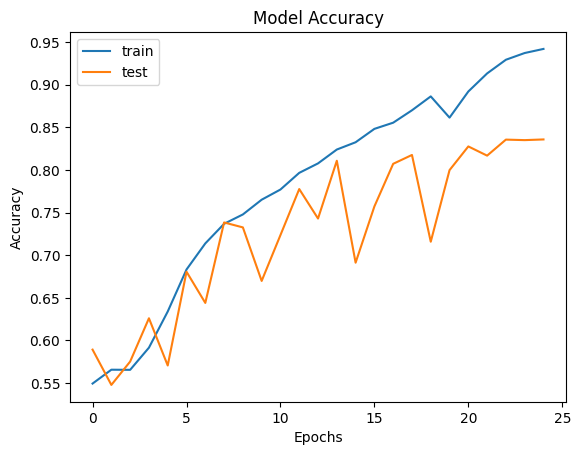

In [18]:
plt.plot(History.history['accuracy'])
plt.plot(History.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend(['train', 'test'])
plt.show()

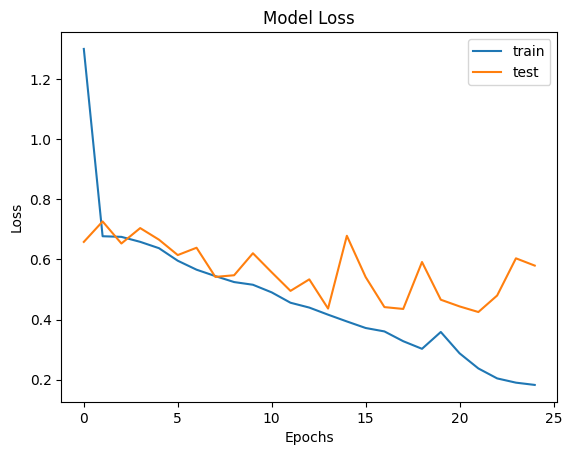

In [19]:
plt.plot(History.history['loss'])
plt.plot(History.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.legend(['train', 'test'])
plt.show()